In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

Δημιουργεία Class για το Νευρωνικό Δίκτυο είναι Αντικειμενοστρεφής προγραμματισμός.\
Αρχιτεκτονική Δικτύου:\
α) input 4 features\
β) 2 hidden layers fully conected\
γ) output 3 classes

Για βασικά των κλασεων δες https://youtu.be/apACNr7DC_s?t=270 \
Το def δηλώνει την δήλωση μιας μεθόδου \
Το __init__ είναι η μέθοδος constractor μας δηλαδή η μέθοδος που κάθε φορά που δημιουργούμε ένα αντικείμενο αυτής της κλάσης μας αρχικοποιεί και δημιουργεί αυτό το αντικείμενο. \
Είναι καλό να βάζω ένα dockstring σε κάθε κλάση και μέθοδο έτσι ώστε να περιγράφω συνοπτικά τι κάνουν.\
Το self συνδέει τις μεταβλητές μέσα στις μεθόδους της κλάσης με το αντικείμενο που δημιουργεί, αλλιώς εαν δεν έχουν self.blabla() και είναι blabla() σκέτο τότε έχουνε εμβέλεια μόνο μέσα στην κλάση. Άρα και για τις μεθόδους μέσα στην class έαν θέλουμε να αφορούν το παιδί θα πρέπει σαν πρώτη παράμετρο να έχουν το self.\
Άρα συνοψίζοντας το self αναφέρεται στο object (=instance στην python) και όποτε θέλω να ανφέρομαι στο object θα βάζω self.

Η κλάση network είναι υποκλάση της κλάσης nn.Module , στην παρένθεση δίπλα από το όνομα της κλάσης μας δηλώνουμε την κλάση Μαμα.\
δες https://www.w3schools.com/python/python_inheritance.asp και https://www.w3schools.com/python/python_classes.asp \
Επομένως πέρνει τα στοιχεία και τις μεθόδους της nn.Module \
ΑΛΛΑ επειδή φτιάχνουμε μέθοδο initialization (__init__) μέσα στην κλάση μας Network κάνουμε override την __init__ της Μαμάς που χρειάζεται για να δουλέυουνε όλες αυτές οι συναρτήσεις neural network που έχουμε μέσα nn.Linear κτλ... και όχι μόνο αυτό δεν αρχικοποιούνται και άλλα πράγματα σωστά για το νευρωνικό δίκτυο. \
Για αυτόν τον λόγο μέσα στην δικιά μας __init__ το πρώτο πράγμα που θα κάνουμε για να δουλέυουν οι συναρτήσεις και τα λοιπά είναι να καλέσουμε την __init__ της Μαμάς κλάσης, αυτό το κάνουμε καλόντας super().__init__() \
Θα μπορούσε αντί αυτόυ να γράφω συγκεκριμένα την Μαμά κλάση έτσι nn.Module.__init__(self) που είναι το ίδιο πράγμα.


In [2]:
class Network(nn.Module):
    """A neural network classifying Irises"""
    def __init__(self,in_features=4,hidden1=8,hidden2=9,out_features=3) :   #def= δημιουργεία function , __init__ αρχικοποιεί ένα νέο αντικείμενο της κλάσηςμ σ.υμφωνα με τις μεταβλητές του
        super().__init__() # nn.Module.__init__(self)
        self.fc1 = nn.Linear(in_features,hidden1)
        self.fc2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
    
    def forward(self,x):
        """Συνάρτηση για forward propagation με ReLU"""
        x=F.relu(self.fc1(x)) #εφαρμογή ReLU στο πρώτο hidden layer (fully concected)
        x=F.relu(self.fc2(x)) #εφαρμογή ReLU στο πρώτο hidden layer (fully concected)
        x=self.out(x) #ταυτόχρονα σπρώχνει το input από το input layer μέχρι το output layer , το output layer δεν έχει ReLU

        return x
    



Το παρακάτω είναι για να συμβαδίζει το NN με το Tutorial να έχουνε το ιδιο seed , αρχική τυχαία περιοχή για να μην αποκλίνουνε πολύ το δικό μου NN με αυτό του Tutorial. (δεν μπένει σε κανονικές εφαρμογές άρα) , (δεν είμαι πολύ σίγουρος για την λειτουργεία του seed )

In [3]:
torch.manual_seed(41)

Δημιουργεία του NeuralNetwork ,  φτιάχνουμε δηλαδή ένα παιδί της κλάσης Network

In [4]:
network = Network()

Load βιβλιοθήκες για την φόρτωση των Data και την παρουσιαση τους σε γραφήματα

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load το Dataset από GitHub link

In [6]:
link = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
Dataframe=pd.read_csv(link)

Πρώτα 5 στοιχεία

In [7]:
Dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Τελευταία 5 στοιχεία

In [8]:
Dataframe.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Αλλαγή των species σε αριθμούς

In [9]:
Dataframe['species'] = Dataframe['species'].replace('setosa',0)
Dataframe['species'] = Dataframe['species'].replace('versicolor',1)
Dataframe['species'] = Dataframe['species'].replace('virginica',2)

Dataframe

C:\Users\jkazi\AppData\Local\Temp\ipykernel_22332\3470656377.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataframe['species'] = Dataframe['species'].replace('virginica',2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Χωρισμός X = input features και y = labels \
για την drop δες https://www.w3schools.com/python/pandas/ref_df_drop.asp

In [10]:
X = Dataframe.drop('species',axis='columns')
print(X.head(),X.dtypes)
y = Dataframe['species']
print(y.head(),y.dtypes)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64 int64


Μετατροπή X και y σε αριθμούς μόνο, από Dataframe σε Numpy array.

In [11]:
X = X.values #προσοχή αυτό είναι συνάρτηση του pandas
y = y.values
print(X.dtype,y.dtype)

float64 int64


Διαχωρισμός train και test datasets

In [12]:
from sklearn.model_selection import train_test_split

Άρα φτιάχνω τα μητρώα X_train, X_test,y_train,y_test για να πάρουν τις νέες διαμερίσεις του dataset και ορίζω το train test split ως 80% / 20% . \
δες εδώ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html \
την έτιμη συνάρτηση που διαχωρίζει τα δεδομένα σε train και test σύνολα με τυχαίο τρόπο για να αλλάζει κάθε φορά το split.

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)
#το random seed = 41 το διαλέγω για να ταιριάζει με αυτό του tutorial αλλιως δεν χρειάζεται..

Μετατροπή των X features σε float tensors

In [14]:
X_train = torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)
print(X_train.dtype,X_test.dtype)

torch.float32 torch.float32


In [15]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
print(y_train.dtype,y_test.dtype)

torch.int64 torch.int64


Ορισμός Loss function και Optimizer \
Στον optimizer βάζουμε την αρχιτεκτονική του δικτύου και το learning rate που θέλουμε.

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01) 

In [17]:
network.parameters

<bound method Module.parameters of Network(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Train το Δίκτυο

In [ ]:
epoch = 100 #100 εποχές
losses =[] #λίστα που θα βλέπω την μεταβολή του cross entropy loss ανα κάθε εποχή

for i in range(epoch):
    y_pred = network.forward(X_train) #πάρε πρόβλεψη από το δίκτυο
    loss = criterion(y_pred,y_train) # προβλεψη vs αληθινό
    #βάλε το loss στην λίστα με τα losses
    losses.append(loss.detach().numpy()) # δες https://www.w3schools.com/python/ref_list_append.asp

    #κάθε δέκα εποχές να βγάζει και το loss ξανά
    if i % 10 == 0:
        print(f'Εποχή: {i} με CrossEntropyLoss {loss}')

    #back propagation
    optimizer.zero_grad() #δες https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html
    #κάνει reset τις παραγώγους από το προηγούμενο back propagation για να είναι ανεξάρτητα κάθες φορά τα back propagations
    loss.backward() #το back propagation υπολογίζει τις μερικές παραγώγους
    optimizer.step() #αναναιώνει τα βάρυ των νευρώνων σύμφωνα με τις μερικές παραγώγους σύμφωνα με τον αλγόριθμο αναναίωσης που διαλέξαμε εδώ Adam


Εποχή: 100 με CrossEntropyLoss 1.0845398902893066
Εποχή: 100 με CrossEntropyLoss 0.9664682745933533
Εποχή: 100 με CrossEntropyLoss 0.737640917301178
Εποχή: 100 με CrossEntropyLoss 0.5255759954452515
Εποχή: 100 με CrossEntropyLoss 0.3548978567123413
Εποχή: 100 με CrossEntropyLoss 0.23634833097457886
Εποχή: 100 με CrossEntropyLoss 0.15937191247940063
Εποχή: 100 με CrossEntropyLoss 0.10882939398288727
Εποχή: 100 με CrossEntropyLoss 0.07856667041778564
Εποχή: 100 με CrossEntropyLoss 0.06083771213889122


Γραφική Loss

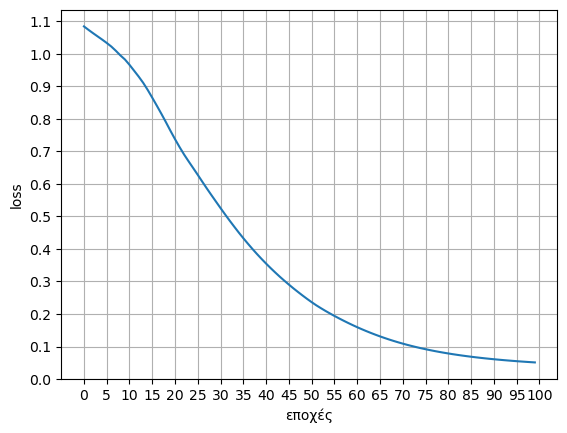

In [37]:
plt.plot(range(epoch),losses)
plt.ylabel('loss')
plt.xticks(np.arange(0,epoch+1,5))
plt.xlabel('εποχές')
plt.yticks(np.arange(0,1.2,0.1))
plt.grid()
plt.show() # στο jupiter notebook πρέπει να βάζω αυτό για να φαίνεται το γράφημα